In [1]:
import numpy as np 
from numpy import cov
import pandas as pd
from pandas import set_option
import csv
import re 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load dữ liệu vào

In [2]:
df = pd.read_csv('car.csv', delimiter='|',engine='python',error_bad_lines=False,warn_bad_lines=False, index_col=False,encoding='utf8')

# Các thuộc tính của dữ liệu

In [3]:
print('The dataset has {} instances and {} attributes.\n'.format(df.shape[0], df.shape[1]))
print('The attributes are : \n {} '.format(df.dtypes))

set_option('display.width', 100)

The dataset has 39422 instances and 18 attributes.

The attributes are : 
 car_model      object
km             object
imp_exp        object
km_1           object
imp_exp_1      object
car_type       object
out_color      object
in_color       object
door_num       object
seat_num       object
new_old        object
car_year       object
title          object
price          object
area           object
poster_name    object
poster_add     object
poster_tel     object
dtype: object 


# Sửa lại dữ liệu cột giá

In [4]:
price_list = []

for x in df['price']:
    word = []
    number = re.findall('\d+',x)
    word = re.findall(r'Tỷ',x)
    if (len(number) == 2):
        a = int(number[0]) *1e9 + int(number[1]) *1e6
    if (len(number) == 1):
        if (len(word) == 1):
            a = int(number[0]) *1e9
        else:
            a = int(number[0]) *1e6
    price_list.append(a)

df['price'] = price_list

# Kiếm tra xem có dữ liệu rỗng nào trong bảng không

In [5]:
print(df.isnull().sum())

car_model      0
km             0
imp_exp        0
km_1           0
imp_exp_1      0
car_type       0
out_color      0
in_color       0
door_num       0
seat_num       0
new_old        0
car_year       0
title          0
price          0
area           0
poster_name    0
poster_add     0
poster_tel     0
dtype: int64


<font color='Red'> 
# Câu hỏi 1: Thông kê số lượng các xe được bán ra nhiều nhất theo loại, hãng, màu,....

# Biểu đồ số lượng các loại xe bán ra theo loại

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Text(0.5, 1.0, 'Biểu đồ số lượng xe bán ra theo từng loại')

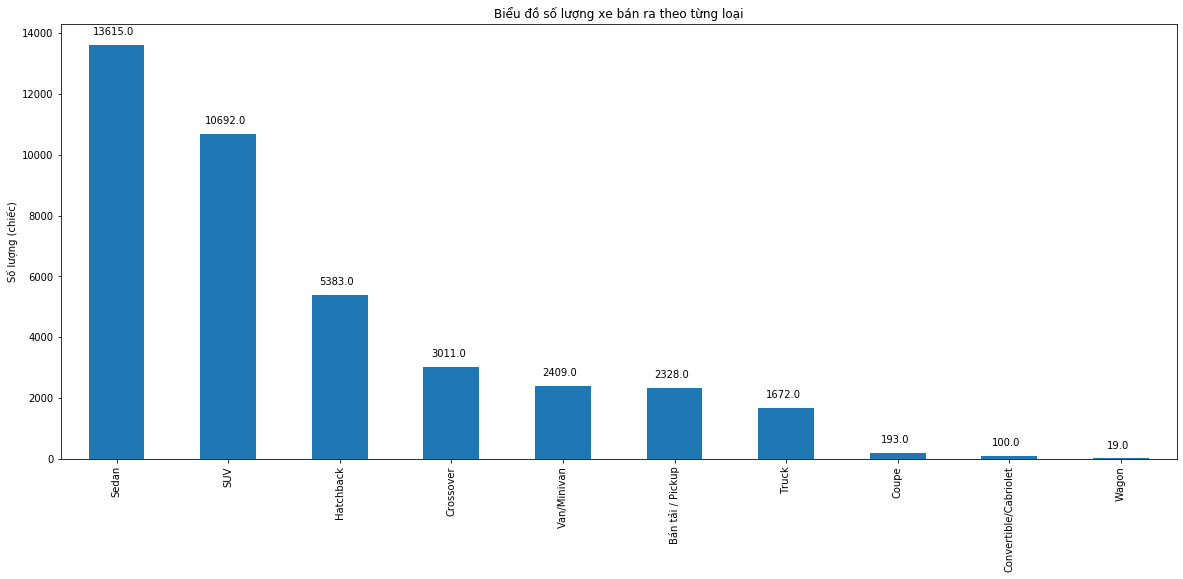

In [6]:
car_model = df['car_type'].unique().tolist()
a = []

for x in car_model:
    a.append(df['car_type'].tolist().count(x))

zip_iterator = zip(car_model, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

x = []
y = [] 

for i in range(len(a_dictionary)):
    x.append(a_dictionary[i][0])
    y.append(a_dictionary[i][1])
    
most_sold_car_type = pd.Series(index = x)

i = 0
for t in x:
    most_sold_car_type[t] = y[i]
    i = i+1 
    
plt.figure(figsize=(20,8))
ax = most_sold_car_type.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Biểu đồ số lượng xe bán ra theo từng loại')

- Nhận xét: Ta thấy những loại xe được bán nhiều nhất ở Việt Nam là Sedan và SUV,.. bới đây những loại xe thông dụng cho người dùng để đi lại phù họp với nhu cầu của đa phần người dân Việt Nam

# Biểu đồ số lượng xe bán ra theo hãng

Text(0.5, 1.0, 'Top 20 hãng xe bán ra nhiều nhất')

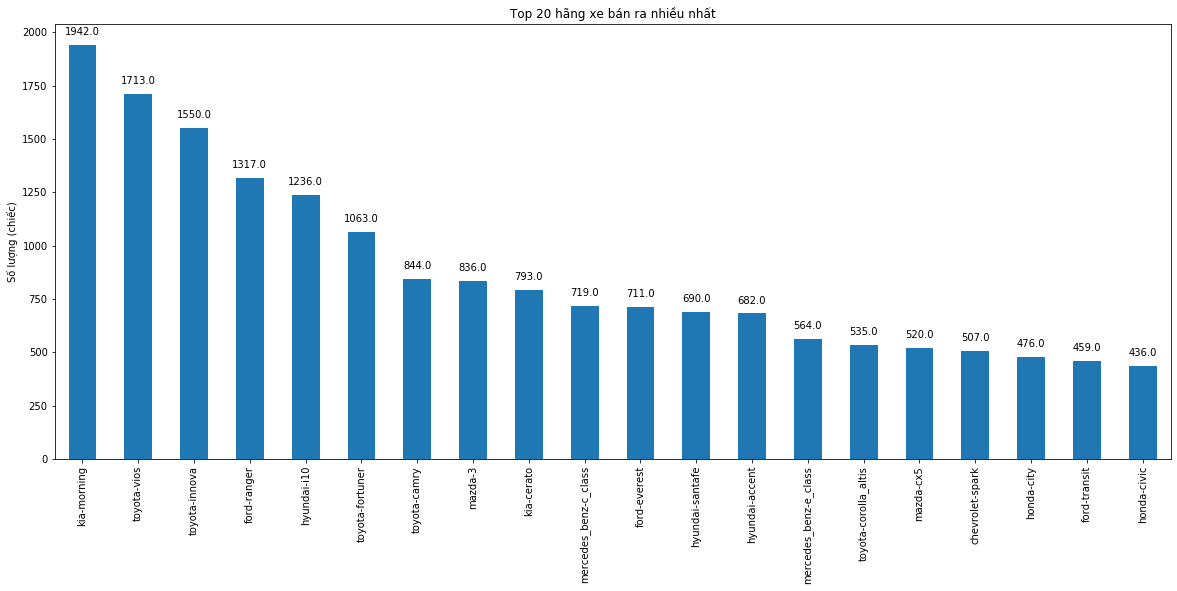

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
car_model = df['car_model'].unique().tolist()
a = []

for x in car_model:
    a.append(df['car_model'].tolist().count(x))

zip_iterator = zip(car_model, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

b = a_dictionary[0:20]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])
    
most_sold_car_model = pd.Series(index = x)

i = 0
for t in x:
    most_sold_car_model[t] = y[i]
    i = i+1 
  
plt.figure(figsize=(20,8))
ax = most_sold_car_model.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Top 20 hãng xe bán ra nhiều nhất')

- Nhận xét: Những hãng bán ra xe nhiều là kia-morning, toyota, ford,... vì ta biết được giá xe ở Việt Nam khá cao và những hãng này đã có thương hiệu nhất định ở Việt Nam cộng thêm giá xe ở mức vừa phải, chất lượng xe ổn nên được đa số người dân Việt Nam ưa chuộng

# Biếu đồ số lượng xe bán ra theo màu

Text(0.5, 1.0, 'Xếp hạng màu xe bán ra nhiều nhất')

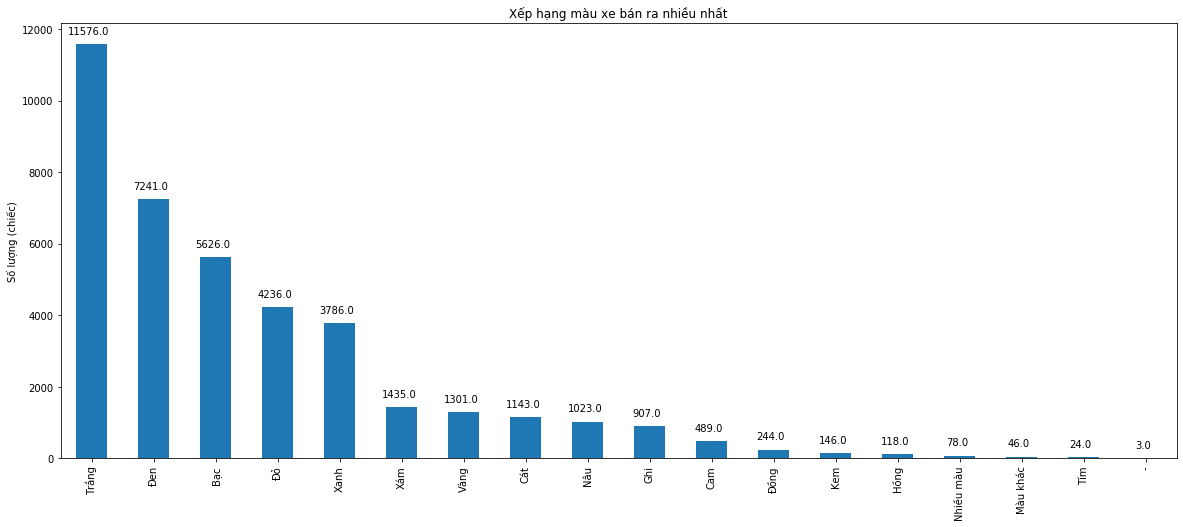

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
car_color = df['out_color'].unique().tolist()
a = []

for x in car_color:
    a.append(df['out_color'].tolist().count(x))

zip_iterator = zip(car_color, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

x = []
y = []

for i in range(len(a_dictionary)):
    x.append(a_dictionary[i][0])
    y.append(a_dictionary[i][1])
    
most_sold_car_color = pd.Series(index = x)

i = 0
for t in x:
    most_sold_car_color[t] = y[i]
    i = i+1 
  
plt.figure(figsize=(20,8))
ax = most_sold_car_color.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Xếp hạng màu xe bán ra nhiều nhất')

- Nhận xét: Người dân Việt Nam đa phần ưa chuộng xe màu đen và trắng vì đây là 2 màu cơ bản nên ko lạ khi 2 màu này được bán nhiều nhất ở Việt Nam

# Biểu đồ số lượng xe bán ra theo giá

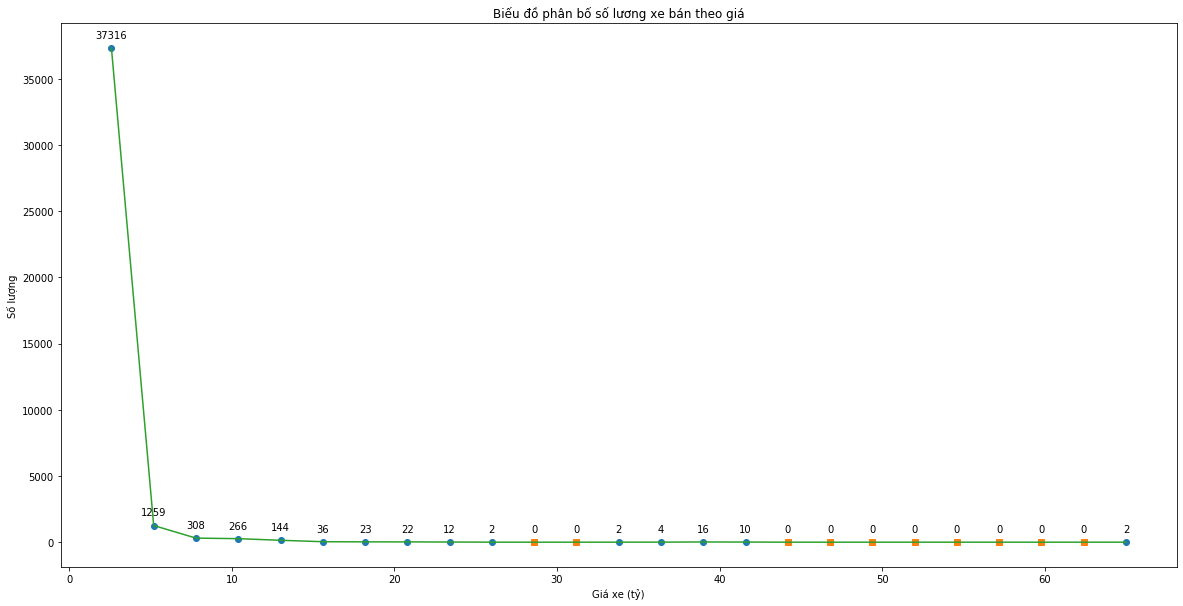

In [9]:
min_price = df['price'].min()
max_price = df['price'].max()

do_chia = max_price/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
    
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    

xs = price_label
ys = price_range

fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(price_range)
plt.ylabel('Số lượng')
plt.xlabel('Giá xe (tỷ)')
plt.title('Biếu đồ phân bố số lương xe bán theo giá')
plt.show()

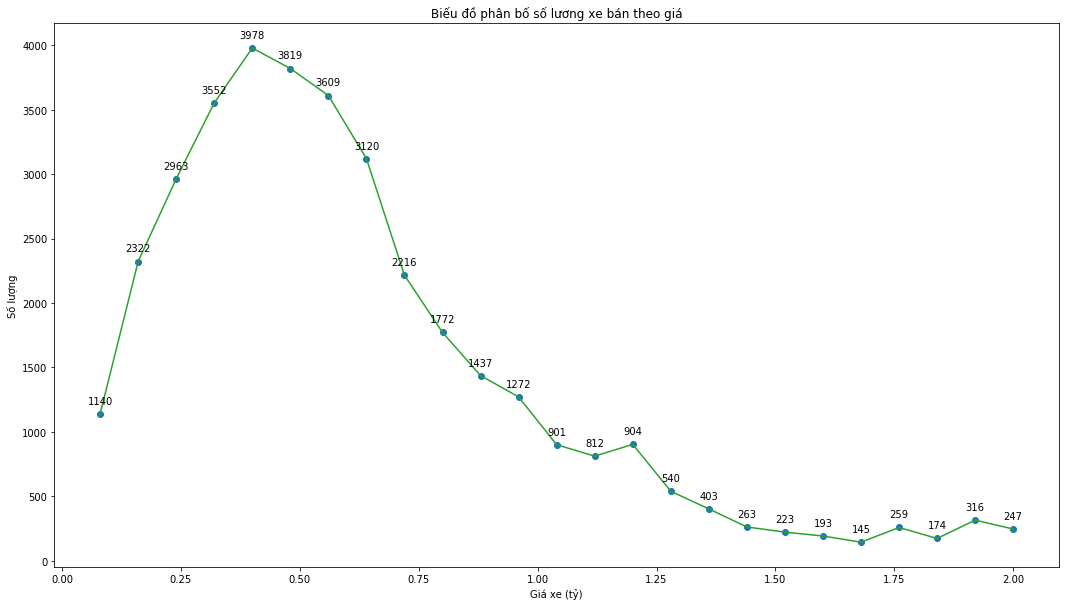

In [10]:
do_chia = 2e9/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
    
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    

xs = price_label
ys = price_range

fig = plt.figure(figsize=(18,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.ylabel('Số lượng')
plt.xlabel('Giá xe (tỷ)')
plt.title('Biếu đồ phân bố số lương xe bán theo giá')
plt.plot(price_range)

plt.show()

- Nhận xét: Thu nhập bình quân đầu người ở Việt Nam khá thấp so với thế giới, nên hầu như người chúng ta không có nhiều tiền để mua xe, xe trong khoảng giá từ 100 triệu - 1 tỷ là khoảng mà được nhiều Việt săn đón nhất

# Biểu đồ số lượng xe bán ra theo thành phố

Text(0.5, 1.0, 'Top 20 thành phố bán xe ra nhiều nhất')

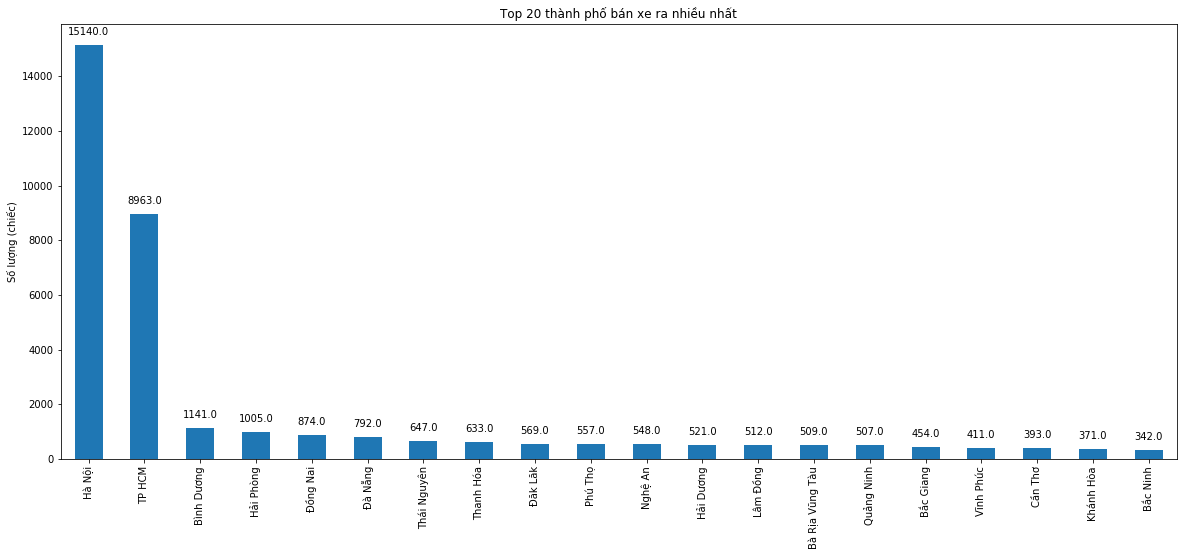

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
area = df['area'].unique().tolist()
a = []

for x in area:
    a.append(df['area'].tolist().count(x))

zip_iterator = zip(area, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

b = a_dictionary[0:20]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])
    
most_sold_car_area = pd.Series(index = x)

i = 0
for t in x:
    most_sold_car_area[t] = y[i]
    i = i+1 
  
plt.figure(figsize=(20,8))
ax = most_sold_car_area.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Top 20 thành phố bán xe ra nhiều nhất')

- Nhận xét: Không có gì lạ khi HN và HCM là 2 nơi bán ra nhiều xe nhất ở Việt Nam vì là 2 thành phố lớn cả nước, người dân ở thu nhập cũng hơn so với số còn lại

## Ý nghĩa: Như vậy với việc rút ra các thuộc tính này thì ta có thể lựa chọn ra các loại xe với các đặc tính phù hợp như đã phân tích để có thể bán với nhiều người mua nhất

<font color='Red'> 
# Câu hỏi 2: Những xe nào có giá tiền cao nhất trong bảng ?

Text(0.5, 1.0, 'Top 20 xe gía tiền cao nhất')

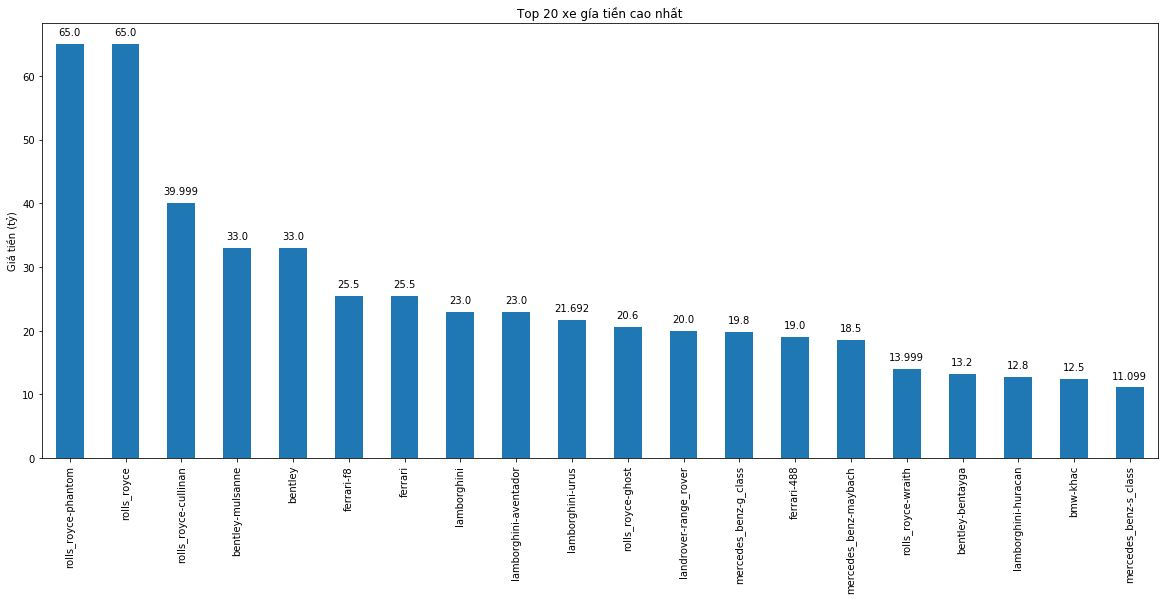

In [12]:
new_df = df.sort_values('price', ascending=False)
car_model = new_df['car_model'].unique()[0:20]

most_price_car = pd.Series(index = car_model)

i = 0
for x in car_model:
    most_price_car[x] = new_df['price'].where(new_df['car_model'] == x).max()/1e9
    i = i+1
    
most_price_car

plt.figure(figsize=(20,8))
ax = most_price_car.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Giá tiền (tỷ)')
plt.title('Top 20 xe gía tiền cao nhất')

- Nhận xét: Đây là những dòng xe hạng sang của thế giới nên không khó hiểu giá của những chiếc xe này là cao ngất ngưởng

## Ý nghĩa: Chúng ta thấy được những xe có mức giá cao nhất đã từng được mua bán ở Việt Nam

<font color='Red'> 
# Câu hỏi 3: Những thuộc tính nào của xe ảnh đến giá tiền của xe và ảnh hưởng như thế nào ?

# Loại bỏ những thành phần không cần thiết trong bảng

In [13]:
df = df.drop(['title','poster_name','poster_add' ,'poster_tel','km_1','imp_exp_1'],axis =1)
def delete_unit(agr):
  return agr.split()[0]

df['km'] = df['km'].apply(delete_unit) 
df['door_num'] = df['door_num'].apply(delete_unit) 
df['seat_num'] = df['seat_num'].apply(delete_unit)

# Tiền xử lí dữ liệu số hoá dữ liệu thành dạng số

In [14]:
df['km'] = df['km'].str.replace(r',','')
df['car_year'] = df['car_year'].str.replace(r'< 1990','1989')

df["km"] = df["km"].astype(np.int64)
df["door_num"] = df["door_num"].astype(np.int64)
df["seat_num"] = df["seat_num"].astype(np.int64)
df["car_year"] = df["car_year"].astype(np.int64)

In [15]:
imp_exp = df["imp_exp"]
car_model = df["car_model"]
car_type = df["car_type"]
out_color = df["out_color"]
in_color = df["in_color"]
new_old = df["new_old"] 
area = df["area"]

In [16]:
df["imp_exp"] = df["imp_exp"].astype('category')
df["car_model"] = df["car_model"].astype('category')
df["car_type"] = df["car_type"].astype('category')
df["out_color"] = df["out_color"].astype('category')
df["in_color"] = df["in_color"].astype('category')
df["new_old"] = df["new_old"].astype('category')
df["area"] = df["area"].astype('category')

df["imp_exp"] = df["imp_exp"].cat.codes
df["car_model"] = df["car_model"].cat.codes
df["car_type"] = df["car_type"].cat.codes
df["out_color"] = df["out_color"].cat.codes
df["in_color"] = df["in_color"].cat.codes
df["new_old"] = df["new_old"].cat.codes
df["area"] = df["area"].cat.codes
df

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area
0,0,0,1,5,15,15,5,7,0,2007,6.300000e+08,45
1,0,0,1,5,1,15,5,7,0,2007,5.800000e+08,17
2,0,0,1,5,1,8,5,7,0,2006,4.650000e+08,45
3,0,0,1,5,15,6,5,7,1,2016,4.665000e+09,45
4,0,9600,1,5,10,3,5,7,0,2015,3.400000e+09,45
...,...,...,...,...,...,...,...,...,...,...,...,...
39417,155,0,1,7,10,7,2,2,0,2015,1.515000e+09,2
39418,155,0,0,7,13,7,2,3,0,2011,1.050000e+08,60
39419,155,25000,0,8,15,13,1,29,0,2017,1.150000e+09,17
39420,155,0,0,7,13,7,2,3,0,2008,8.000000e+07,14


# Phân tích tỉ lệ tương quan giữa các biến

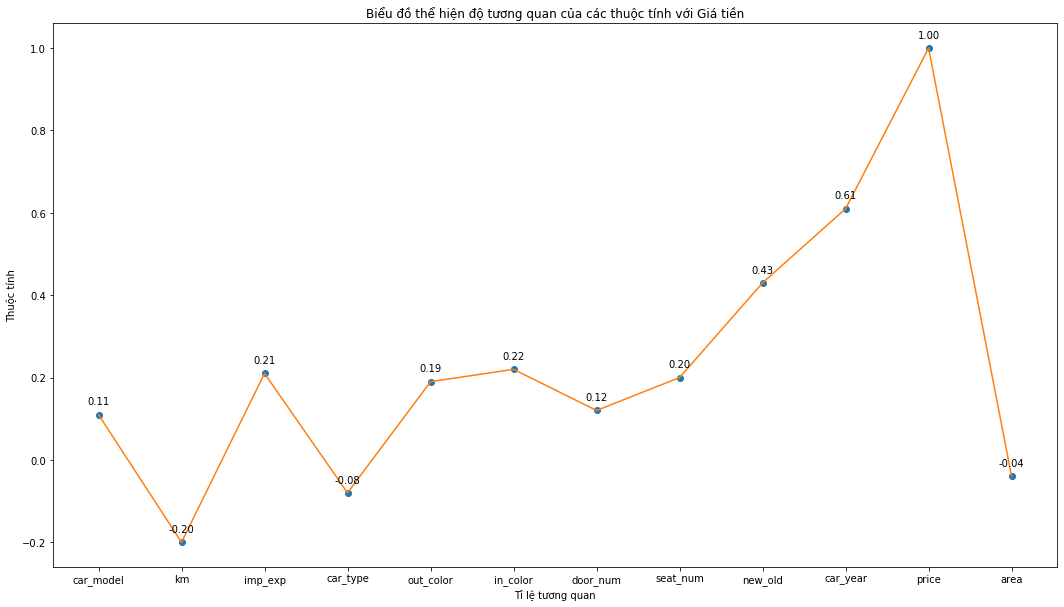

In [17]:
from scipy.stats import spearmanr

cov_list = []
for x in df.columns:
    temp, _ = spearmanr(df[x],df['price'])
    cov_list.append(f"{temp:.2f}")
    
for i in range(len(cov_list)):
    cov_list[i] = float(cov_list[i])
    
coor_df = pd.Series(index = df.columns)
i = 0
for x in df.columns:
    coor_df[x] = cov_list[i]
    i = i + 1


        
    
fig = plt.figure(figsize=(18,10))
ax = plt.axes()
plt.plot(coor_df, 'o') 

xs = np.arange(0,12,1)   
ys = coor_df
    
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylabel('Thuộc tính')
plt.xlabel('Tỉ lệ tương quan')
plt.title('Biểu đồ thể hiện độ tương quan của các thuộc tính với Giá tiền')
plt.plot(coor_df)

plt.show()

- Nhận xét: Dựa vào biếu đồ trên ta có thấy được những yếu nào ảnh hưởng đến giá xe nhiều như: car_year (Năm SX xe), new_old(mới/cũ),... 

# Ý nghĩa: Dựa vào các độ tương quan này, chúng ta có thể biết được yếu nào ảnh hưởng tới xe nhiều, yếu tố nào ảnh hưởng tới xe ít để từ đó ta có thể định giá được chiếc xe đó cho phù hợp 